<a href="https://colab.research.google.com/github/Nicolas-Noir/AA2-TUIA-2025/blob/main/Practica/AA2_lab2_c_18_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2c: Clasificación Multiclase

## Preparación del entorno.

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [ ]:
import os

REPO_NAME = "lab2"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)



## Análisis Exploratorio.

Importar librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Establecer GPU por defecto en caso de estar disponible

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

Cargar y visualizar los datos.

In [ ]:
data = pd.read_csv('dataset-lab2-c.csv')
print(data.head())

         X1        X2    Y
0  0.467469  0.046469  0.0
1  0.327517  0.161267  0.0
2  0.105278  0.171040  0.0
3  0.054194  0.475245  0.0
4  0.694185  0.254754  2.0


Plot de los datos.

X1 shape: (1000, 1)
X2 shape: (1000, 1)
Y shape: (1000,)


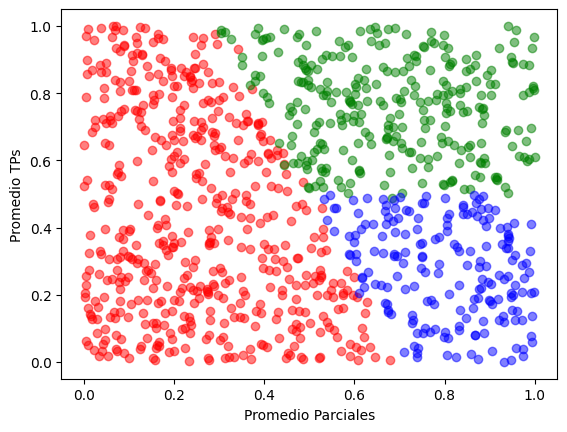

In [ ]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

# X1 = X1*2-1
# X2 = X2*2-1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1.reshape(-1, 1))
X2 = scaler.fit_transform(X2.reshape(-1, 1))

print("X1 shape:", X1.shape)
print("X2 shape:", X2.shape)
print("Y shape:", Y.shape)

plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)
plt.scatter(X1[Y == 2], X2[Y == 2], color='blue', alpha=0.5)

plt.xlabel('Promedio Parciales')
plt.ylabel('Promedio TPs')

plt.show()

Definimos nuestro modelo usando tensorflow.

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
normalization_layer.adapt(np.column_stack([X1, X2]))
print("media", normalization_layer.mean)
print("std", normalization_layer.variance)

print(normalization_layer(np.array([0.5,0.5])))

model = tf.keras.Sequential([
    ##### DEFINIR EL MODELO AQUI #####
    # Definir un modelo sin capas ocultas.
    # Elegir correctamente la función de activación y
    # la cantidad de neuronas de la capa de salida en
    # base al problema.
    ##################################


    tf.keras.layers.Input(shape=(2,)),
    normalization_layer,
    tf.keras.layers.Dense(units=3, activation='softmax')

])

media tf.Tensor([[0.48282844 0.49527526]], shape=(1, 2), dtype=float32)
std tf.Tensor([[0.08345056 0.08569601]], shape=(1, 2), dtype=float32)
tf.Tensor([[0.05944224 0.01613978]], shape=(1, 2), dtype=float32)


Entrenamos el modelo.

*Nota: "sparse_categorical_crossentropy" encodea variables categoricas a one-hot y luego calcula binary_cross_entropy para cada componente. Nos permite utilizar `Y` directamente en formato {0,1,2} sin necesidad de encodearlo en one-hot.*

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

x = np.column_stack([X1, X2])
y = Y
print(x.shape)
print(y.shape)
model.fit(x=x, y=y, epochs=50)

(1000, 2)
(1000,)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7977 - loss: 0.4667
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9531 - loss: 0.1216
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9575 - loss: 0.1028
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9554 - loss: 0.1034
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.0966
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9761 - loss: 0.0856
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.0972
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9553 - loss: 0.1105
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.0893  
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9551 - loss: 0.0992 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.0832 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

Definimos una función para plotear la frontera de decisión sobre los datos.

In [ ]:
def plot_results(X1, X2, Y, model):
    plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
    plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)
    plt.scatter(X1[Y == 2], X2[Y == 2], color='blue', alpha=0.5)

    plt.xlabel('Promedio Parciales')
    plt.ylabel('Promedio TPs')

    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)

    # Create a meshgrid with all the possible combinations of x1 and x2
    x1, x2 = np.meshgrid(x1, x2, indexing='ij')

    # This is equivalent to
    # x = np.array([[i, j] for i in x1 for j in x2])
    x = np.array([x1.ravel(), x2.ravel()]).T

    # Predict the value for each point in the meshgrid
    y = model.predict(x)

    # Convert from one-hot encoding to a single number
    y = np.argmax(y, axis=-1).reshape(x1.shape)

    # Use cmap red and green
    plt.contourf(x1, x2, y, alpha=0.1, cmap='RdYlGn')

    # Draw the decision boundary
    plt.contour(x1, x2, y, levels=[0, 1, 2], colors='blue')

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

Plot de la frontera de decisión.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


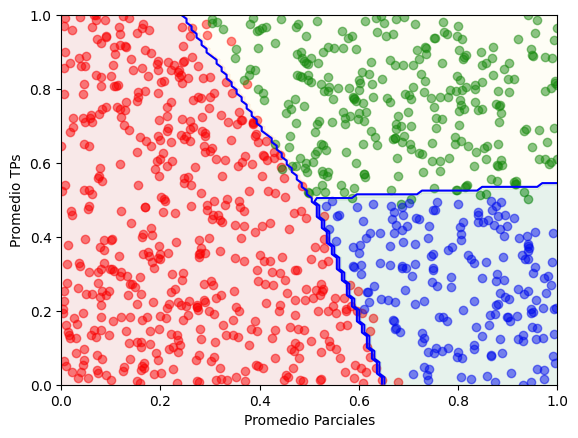

In [ ]:
plot_results(X1, X2, Y, model)

Vemos que el modelo llega a una solución aceptable.

Probemos entonces con un modelo más complejo (para ver que pasa).

*Nota: el entrenamiento puede no converger a una solución óptima. Se propone correr el entrenamiento varias veces hasta que se obtenga una solución aceptable. Más adelante estudiaremos técnicas para mejorar la convergencia.*

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5094 - loss: 1.1296
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.2984
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9520 - loss: 0.1152
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9314 - loss: 0.1504
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9579 - loss: 0.1100
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9547 - loss: 0.0960
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9289 - loss: 0.1758
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9629 - loss: 0.0893
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9171 - loss: 0.2441
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9500 - loss: 0.1214
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.0897
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9697 - lo

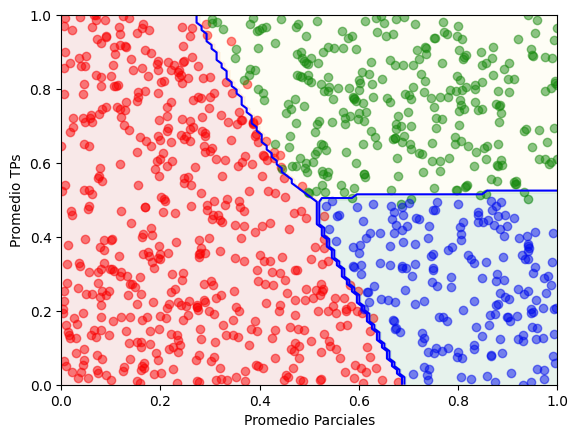

In [ ]:
model = tf.keras.Sequential([
    ##### DEFINIR EL MODELO AQUI #####
    # Definir un modelo más complejo con capas ocultas.
    # Experimentar con la cantidad de capas, neuronas y
    # funciones de activación.
    # Elegir correctamente la función de activación y
    # la cantidad de neuronas de la capa de salida en
    # base al problema.
    ##################################

    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=8, activation='sigmoid'),
    tf.keras.layers.Dense(units=3, activation='softmax')



])

# Experimentar con distintos valores de learning rate
# y observar cómo afecta a la convergencia del modelo.
# Probar distintos órdenes de magnitud. Ej: 5, 0.5, 0.05, 0.005, 0.0005
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x=x, y=y, epochs=50)

plot_results(X1, X2, Y, model)